<!-- Department Logo + Title Block -->

<div style="display: flex; align-items: center; justify-content: space-between; padding: 15px; border-bottom: 3px solid #003366;">

  <!-- Logo -->
  <div style="flex: 0 0 auto;">
    <img src="dcs_logo_small.png" alt="Department Logo" style="height:150px;">
  </div>

  <!-- Title -->
  <div style="text-align: center; flex-grow: 0; flex-shrink: 1; margin: 0 auto;">
    <h1 style="margin: 0; font-size: 26px; color: #003366;">Deep Reinforcement Learning (CS-866)</h1>
    <h2 style="margin: 0px 0; font-size: 20px; color: #005599;">Department of Computer Science</h2>
    <h2 style="margin: 0px 0; font-size: 20px; color: #005599;">University of the Punjab</h2>
    <br><br>
    <h3 style="margin: 0px 0; font-size: 20px; color: #222;"><b>GridWorld with Value Iteration</b></h3>
    <h4 style="margin: 0px 0; font-size: 16px; color: #444;"><b>Instructor: <b>Nazar Khan</b></h4>    
  </div>

  <!-- Right Logo -->
  <!--<div style="flex: 0 0 auto;">
    <img src="pu_logo.png" alt="University Logo" style="height:180px;">
  </div>-->

  <!-- Empty Spacer (optional for symmetry) -->
  <div style="flex: 0 0 auto; width: 80px;"></div>
</div>


This notebook introduces students to:
1. Creating and playing with a simple GridWorld environment.
2. Understanding rewards by interacting manually.
3. Comparing two agents:
   - **Random agent**: acts randomly.
   - **Value Iteration agent**: computes an optimal policy via dynamic programming.
4. Visualizing learning outcomes with heatmaps and side-by-side GIFs.


### 1. GridWorld Environment Setup

- Size 5x5
- Start state (0,0)
- Goal state (4,4)
- Holes at (1,1) and (2,3)

In [17]:
import numpy as np
import ipywidgets as widgets
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import Image

class GridWorld:
    def __init__(self, size=5, reset_break=5, holes=None):
        self.size = size
        self.reset_break = reset_break
        self.start = (0, 0)
        self.goal = (size-1, size-1)
        self.holes = holes if holes else [(1,1), (2,3)]
        self.episode = 0
        self.actions = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)} # up, down, left, right
        self.reset()
        
    def reset(self):
        self.agent_pos = [0, 0]
        self.done = False
        self.steps = 0
        self.total_reward = 0
        self.episode += 1
        return tuple(self.agent_pos)
    
    def step(self, action):
        if self.done:
            return tuple(self.agent_pos), 0, True, {}
            
        move = self.actions[action]
        new_pos = [self.agent_pos[0] + move[0], self.agent_pos[1] + move[1]]

        # stay in bounds
        if 0 <= new_pos[0] < self.size and 0 <= new_pos[1] < self.size:
            self.agent_pos = new_pos

        state = tuple(self.agent_pos)

        # check terminal conditions
        if state == self.goal:
            reward, done, info = 10, True, f"You reached the goal! Resetting in {self.reset_break} seconds."
        elif state in self.holes:
            reward, done, info = -10, True, f"You fell into a hole! Resetting in {self.reset_break} seconds."
        else:
            reward, done, info = -1, False, ""

        self.total_reward += reward
        self.done = done
        self.steps += 1

        msg = (f"Episode {self.episode} | Step {self.steps} | "
               f"Reward {reward:+} | Total Reward {self.total_reward:+}")
        if info:
            msg += " → " + info

        #return tuple(self.agent_pos), reward, done, {"msg": msg}
        return state, reward, done, {"msg": msg}
    
    def render_dot_grid(self):
        grid = np.full((self.size, self.size), ".")
        # Goal
        grid[self.size-1, self.size-1] = "G"
        # Holes
        for (r, c) in self.holes:
            grid[r, c] = "H"
        # Agent (show step number instead of "A")
        grid[self.agent_pos[0], self.agent_pos[1]] = str(self.steps)
        for row in grid:
            print(" ".join(row))

    def render(self, ax=None, title=""):
        """Draw grid with agent, holes, and goal."""
        grid = np.zeros((self.size, self.size))
        for h in self.holes:
            grid[h] = -1
        grid[self.goal] = 2
        #grid[self.agent_pos[0], self.agent_pos[1]] = 1

        cmap = colors.ListedColormap(["red", "blue", "black", "green"])
        bounds = [-2, -0.5, 0.5, 1.5, 2.5]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        if ax is None:
            fig, ax = plt.subplots()
        ax.imshow(grid, cmap=cmap, norm=norm)
        ax.text(self.agent_pos[1], self.agent_pos[0], str(self.steps),
                    ha="center", va="center",
                    color="white", fontsize=12, fontweight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(title)
        return ax

### 2. Manual exploration of the GridWorld

In [18]:
# ---- interactive play ----
env = GridWorld(size=5)

output = widgets.Output()

def update_display(message=""):
    with output:
        clear_output(wait=True)
        env.render_dot_grid()
        if message:
            print(message)

def make_move(action):
    state, reward, done, info = env.step(action)
    update_display(info.get("msg", ""))
    if done:
        time.sleep(env.reset_break)
        env.reset()
        update_display(f"New Episode {env.episode} started!")

# Buttons
btn_up = widgets.Button(description="↑")
btn_down = widgets.Button(description="↓")
btn_left = widgets.Button(description="←")
btn_right = widgets.Button(description="→")

btn_up.on_click(lambda _: make_move(0))
btn_down.on_click(lambda _: make_move(1))
btn_left.on_click(lambda _: make_move(2))
btn_right.on_click(lambda _: make_move(3))

controls = widgets.HBox([btn_left, btn_up, btn_down, btn_right])

display(controls, output)
update_display("Start exploring!")

Output()

### 3. Random agent

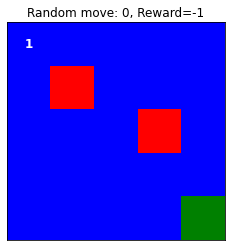

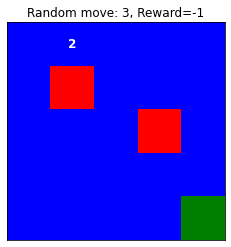

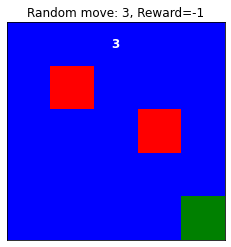

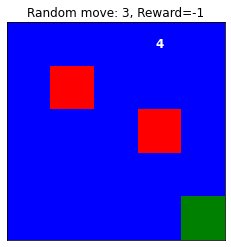

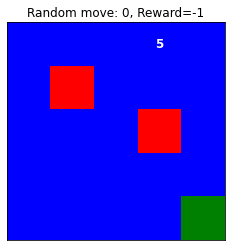

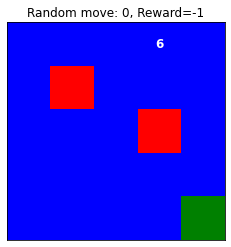

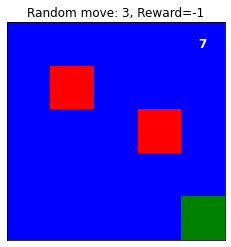

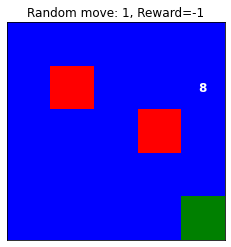

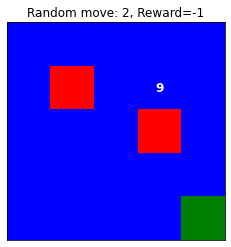

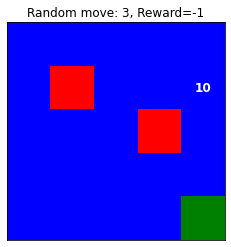

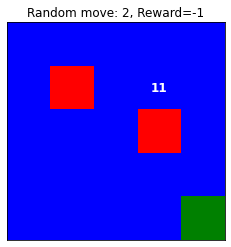

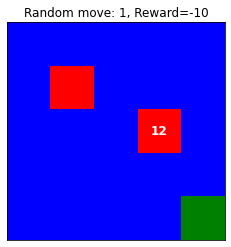

Total reward: -21


In [19]:
import random
def random_policy(state):
    return random.choice(list(env.actions.keys()))

# Run one random episode
state = env.reset()
done = False
while not done:
    action = random_policy(state)
    state, reward, done, info = env.step(action)
    env.render(title=f"Random move: {action}, Reward={reward}")
    plt.show()
print("Total reward:", env.total_reward)

### 4. Train an agent using Value Iteration

```
def value_iteration():
    initialize(V) 
    while not convergence(V):
        for s in range(S):
            for a in range(A):
                for s' in range(S):
                    Q[s,a] = Q[s,a] + T_a(s,s')(R_a(s,s') + gamma * V[s'])
            V[s] = max_a(Q[s,a])
    return V
```

In [20]:
def value_iteration(env, gamma=0.99, theta=1e-5):
    """
    Value Iteration algorithm (structured like textbook pseudocode).

    Args:
        env: GridWorld environment with:
             - env.size
             - env.goal (tuple)
             - env.holes (set of tuples)
             - env.actions (dict: action -> (dx, dy))
        gamma: Discount factor
        theta: Convergence threshold

    Returns:
        V: dict, state -> value
        Q: dict, (state, action) -> value
        policy: dict, state -> best action
    """

    # ------------------------------
    # Initialization
    # ------------------------------
    states = [(i, j) for i in range(env.size) for j in range(env.size)]
    actions = list(env.actions.keys())

    # Initialize V(s) = 0 for all states
    V = {s: 0.0 for s in states}

    # Initialize Q(s,a) = 0 for all state-action pairs
    Q = {(s, a): 0.0 for s in states for a in actions}

    # Transition function T(s,a) -> s' (deterministic)
    def T(s, a):
        dx, dy = env.actions[a]
        new_pos = (s[0] + dx, s[1] + dy)
        # Stay in place if outside bounds
        if not (0 <= new_pos[0] < env.size and 0 <= new_pos[1] < env.size):
            new_pos = s
        return new_pos

    # Reward function R(s,a,s') (handcrafted)
    def R(s, a, s_next):
        if s_next == env.goal:
            return 10
        elif s_next in env.holes:
            return -10
        else:
            return -1

    # ------------------------------
    # Iteration until convergence
    # ------------------------------
    while True:
        delta = 0
        for s in states:
            if s == env.goal or s in env.holes:
                continue  # terminal states not updated

            v = V[s]  # old value
            q_values = []

            for a in actions:
                s_next = T(s, a)
                r = R(s, a, s_next)
                # deterministic transition → only one s'
                Q[(s, a)] = r + gamma * V[s_next]
                q_values.append(Q[(s, a)])

            # Bellman optimality update
            V[s] = max(q_values)

            delta = max(delta, abs(v - V[s]))

        # Check convergence
        if delta < theta:
            break

    # ------------------------------
    # Extract greedy policy
    # ------------------------------
    policy = {}
    for s in states:
        if s == env.goal or s in env.holes:
            continue
        # argmax_a Q[s,a]
        best_a = max(actions, key=lambda a: Q[(s, a)])
        policy[s] = best_a

    return V, Q, policy


In [21]:
def value_iteration_compact(env, gamma=0.99, theta=1e-5):
    """
    Value Iteration algorithm (compact version).
    Does not save an explicit Q-table. Instead, it
    takes the max over actions and saves directly
    in V.

    WE ARE NOT USING THIS FUNCTION IN THIS NOTEBOOK.

    Args:
        env: GridWorld environment with:
             - env.size
             - env.goal (tuple)
             - env.holes (set of tuples)
             - env.actions (dict: action -> (dx, dy))
        gamma: Discount factor
        theta: Convergence threshold

    Returns:
        V: dict, state -> value
        policy: dict, state -> best action
    """
    V = { (i,j): 0 for i in range(env.size) for j in range(env.size) }
    policy = {}

    while True:
        delta = 0
        for state in V:
            if state == env.goal or state in env.holes:
                continue

            v = V[state]
            action_values = []
            for a, move in env.actions.items():
                new_pos = (state[0]+move[0], state[1]+move[1])
                if not (0 <= new_pos[0] < env.size and 0 <= new_pos[1] < env.size):
                    new_pos = state
                if new_pos == env.goal:
                    r, done = 10, True
                elif new_pos in env.holes:
                    r, done = -10, True
                else:
                    r, done = -1, False
                action_values.append(r + gamma*V[new_pos])

            V[state] = max(action_values)
            delta = max(delta, abs(v - V[state]))

        if delta < theta:
            break

    # Extract greedy policy
    for state in V:
        if state == env.goal or state in env.holes:
            continue
        best_a, best_val = None, -np.inf
        for a, move in env.actions.items():
            new_pos = (state[0]+move[0], state[1]+move[1])
            if not (0 <= new_pos[0] < env.size and 0 <= new_pos[1] < env.size):
                new_pos = state
            if new_pos == env.goal:
                r, done = 10, True
            elif new_pos in env.holes:
                r, done = -10, True
            else:
                r, done = -1, False
            val = r + gamma*V[new_pos]
            if val > best_val:
                best_a, best_val = a, val
        policy[state] = best_a

    return V, policy

In [22]:
env = GridWorld(size=5)
V, Q, vi_policy = value_iteration(env)
#V, vi_policy = value_iteration_compact(env)

### 5. Visualize V: value of each state after training

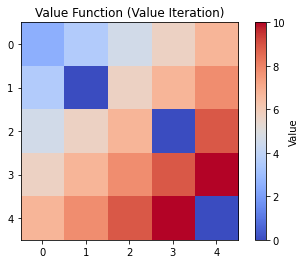

In [23]:
grid = np.zeros((env.size, env.size))
for i in range(env.size):
    for j in range(env.size):
        grid[i,j] = V[(i,j)]

plt.imshow(grid, cmap="coolwarm", origin="upper")
plt.colorbar(label="Value")
plt.title("Value Function (Value Iteration)")
plt.show()

### 6. Visualize policy (best action in each state)

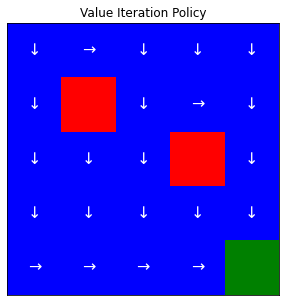

In [24]:
import matplotlib.pyplot as plt
from matplotlib import colors

def render_policy(env, policy, title="Value Iteration Policy"):
    """
    Visualize a deterministic policy on the GridWorld.

    Args:
        env: GridWorld environment (with size, holes, goal).
        policy: dict {state_index: action_index} from value iteration.
        title: Plot title.
    """
    grid = np.zeros((env.size, env.size))
    for h in env.holes:
        grid[h] = -1
    grid[env.goal] = 2

    cmap = colors.ListedColormap(["red", "blue", "black", "green"])
    bounds = [-2, -0.5, 0.5, 1.5, 2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid, cmap=cmap, norm=norm)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

    # Map actions to arrow symbols
    action_symbols = {
        0: "↑",  # up
        1: "↓",  # down
        2: "←",  # left
        3: "→"   # right
    }

    for state, action in policy.items():
        r, c = state

        # Skip goal and holes
        if (r, c) == env.goal or (r, c) in env.holes:
            continue

        ax.text(c, r, action_symbols[action],
                ha="center", va="center",
                fontsize=16, color="white")

    plt.show()

render_policy(env, vi_policy, "Value Iteration Policy")

### 7. Visualize Q-table

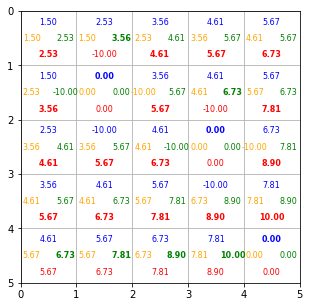

In [25]:
def plot_q_table(Q):
    # Extract states and actions
    states = [s for (s, a) in Q.keys()]
    actions = [a for (s, a) in Q.keys()]
    
    # Get grid dimensions
    n_rows = max(r for r, c in states) + 1
    n_cols = max(c for r, c in states) + 1
    n_actions = len(set(actions))
    
    fig, ax = plt.subplots(figsize=(n_cols, n_rows))
    ax.set_xlim(0, n_cols)
    ax.set_ylim(0, n_rows)
    ax.set_xticks(np.arange(0, n_cols+1, 1))
    ax.set_yticks(np.arange(0, n_rows+1, 1))
    ax.grid(True)
    ax.invert_yaxis()

    for (r, c) in set(states):
        # Collect Q-values for this state
        q_vals = [Q.get(((r, c), a), 0.0) for a in range(n_actions)]
        best_action = np.argmax(q_vals)

        for a, q_val in enumerate(q_vals):
            is_best = (a == best_action)
            style = {'weight': 'bold'} if is_best else {}

            if a == 0:   # Up
                ax.text(c+0.5, r+0.2, f"{q_val:.2f}", 
                        ha='center', va='center', fontsize=8, color='blue', **style)
            elif a == 1: # Down
                ax.text(c+0.5, r+0.8, f"{q_val:.2f}", 
                        ha='center', va='center', fontsize=8, color='red', **style)
            elif a == 2: # Left
                ax.text(c+0.2, r+0.5, f"{q_val:.2f}", 
                        ha='center', va='center', fontsize=8, color='orange', **style)
            elif a == 3: # Right
                ax.text(c+0.8, r+0.5, f"{q_val:.2f}", 
                        ha='center', va='center', fontsize=8, color='green', **style)

    plt.show()

plot_q_table(Q)


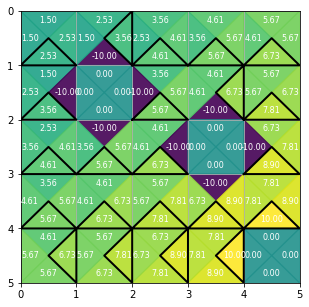

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_q_table_triangles(Q):
    # Extract states and actions
    states = [s for (s, a) in Q.keys()]
    actions = [a for (s, a) in Q.keys()]
    
    # Grid dimensions
    rows = max(r for r, c in states) + 1
    cols = max(c for r, c in states) + 1
    n_actions = len(set(actions))

    fig, ax = plt.subplots(figsize=(cols, rows))
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(np.arange(0, cols+1, 1))
    ax.set_yticks(np.arange(0, rows+1, 1))
    ax.grid(True)
    ax.invert_yaxis()
    
    # Normalize Q-values for colormap
    q_vals_all = list(Q.values())
    vmin, vmax = min(q_vals_all), max(q_vals_all)
    norm = plt.Normalize(vmin, vmax)
    cmap = plt.cm.viridis

    for (r, c) in set(states):
        q_vals = [Q.get(((r, c), a), 0.0) for a in range(n_actions)]
        max_q = np.max(q_vals)
        best_action = np.argmax(q_vals)

        # Coordinates of the square
        x, y = c, r
        square = [(x, y), (x+1, y), (x+1, y+1), (x, y+1)]
        cx, cy = x+0.5, y+0.5  # center

        # Triangles for each action
        triangles = {
            0: [(x, y), (x+1, y), (cx, cy)],       # Up
            3: [(x+1, y), (x+1, y+1), (cx, cy)],   # Right
            1: [(x, y+1), (x+1, y+1), (cx, cy)],   # Down
            2: [(x, y), (x, y+1), (cx, cy)]        # Left
        }

        for a, tri in triangles.items():
            color = cmap(norm(q_vals[a]))
            ax.fill(*zip(*tri), color=color, alpha=0.9)
            
            # Draw bold border for best action
            if a == best_action and max_q > 0:
                ax.plot(*zip(*tri, tri[0]), color="black", linewidth=2)

            # Place Q-value text inside triangle
            tx, ty = np.mean([p[0] for p in tri]), np.mean([p[1] for p in tri])
            ax.text(tx, ty, f"{q_vals[a]:.2f}", ha='center', va='center', fontsize=8, color="white")

    plt.show()

plot_q_table_triangles(Q)

### 7. Record episode as GIF sequence

In [27]:
#import imageio

def record_episode(env, policy, filename="episode.gif", max_steps=50, fps=1):
    frames = []
    fig, ax = plt.subplots()

    state = env.reset()
    done = False
    steps = 0
    while not done and steps < max_steps:
        ax.clear()
        env.render(ax=ax, title=f"Step {steps}, Total Reward {env.total_reward}")
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(frame)

        action = policy(state)
        state, reward, done, info = env.step(action)
        #print(action, state, reward, done)
        steps += 1

        if done:
            ax.clear()
            env.render(ax=ax, title=f"Step {steps}, Total Reward {env.total_reward}")
            fig.canvas.draw()
            fig.canvas.flush_events()
            frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            frames.append(frame)

    plt.close(fig)
    
    import imageio
    imageio.mimsave(filename, frames, fps=fps)
    return filename

/tmp/ipykernel_19506/1055403448.py:15: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykernel_19506/1055403448.py:29: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


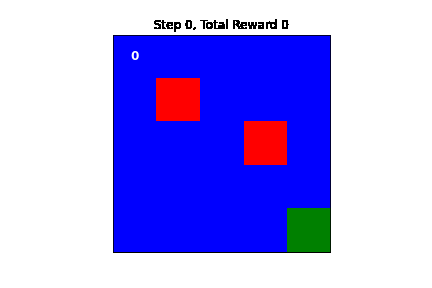

In [28]:
vi_policy_fn = lambda s: vi_policy[s] if s in vi_policy else random.choice(list(env.actions.keys()))
record_episode(env, vi_policy_fn, "value_iteration.gif", fps=1)
Image(filename="value_iteration.gif")

### 8. Side-by-Side Comparison

In [29]:
def make_side_by_side_gif(env, policy1, policy2, labels=("Policy1","Policy2"),
                          filename="comparison.gif", max_steps=50, num_episodes=5, fps=2):
    import imageio
    frames = []
    fig, axes = plt.subplots(1,2, figsize=(8,4))

    max_steps = env.size*env.size

    for episode in range(num_episodes):
        # Reset env for both runs
        env1, env2 = GridWorld(size=env.size, holes=env.holes), GridWorld(size=env.size, holes=env.holes)
        state1, state2 = env1.reset(), env2.reset()
        done1, done2 = False, False
        steps = 0
        episode_frames = []

        while (not done1 or not done2) and steps < max_steps:
            for ax in axes: ax.clear()

            if not done1:
                env1.render(ax=axes[0], title=labels[0]+f" Episode {episode+1}")
                action1 = policy1(state1)
                state1, reward1, done1, info1 = env1.step(action1)
            else:
                env1.render(ax=axes[0], title=labels[0]+f" Episode {episode+1}"+" (done)")

            if not done2:
                env2.render(ax=axes[1], title=labels[1]+f" Episode {episode+1}")
                action2 = policy2(state2)
                state2, reward2, done2, info2 = env2.step(action2)
            else:
                env2.render(ax=axes[1], title=labels[1]+f" Episode {episode+1}"+" (done)")

            fig.canvas.draw()
            frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            episode_frames.append(frame)

            steps += 1

        if env1.steps != env2.steps:
            for ax in axes: ax.clear()
            #render last step
            #if env1.steps > env2.steps:
            #    print("env1.steps", env1.steps)
            env1.render(ax=axes[0], title=labels[0]+f" Episode {episode+1}"+" (done)")
            #else:
            #    print("env2.steps", env2.steps)
            env2.render(ax=axes[1], title=labels[1]+f" Episode {episode+1}"+" (done)")
            fig.canvas.draw()
            frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            episode_frames.append(frame)
        
        frames.extend(episode_frames)
    plt.close(fig)
    imageio.mimsave(filename, frames, fps=fps)
    return filename

/tmp/ipykernel_19506/1482855328.py:35: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ipykernel_19506/1482855328.py:51: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


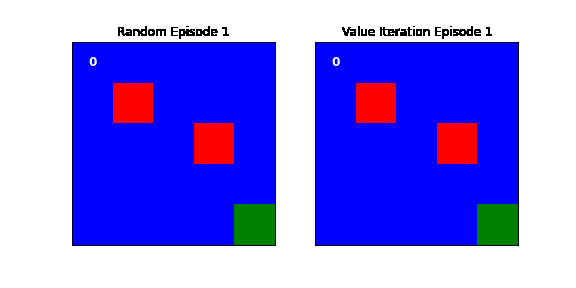

In [14]:
# Compare random vs. value iteration
random_policy_fn = lambda s: random.choice(list(env.actions.keys()))
comparison_file = make_side_by_side_gif(env, random_policy_fn, vi_policy_fn,
                                        labels=("Random", "Value Iteration"),
                                        filename="random_vs_vi.gif", max_steps=env.size**2, num_episodes=5, fps=2)

Image(filename=comparison_file)

## Exercises

1. **Make a new notebook called GridWorld_3H.ipynb. Train an agent for a GridWorld with 3 holes. Visualize V, the policy, and the Q-table. Save GIF of the agent in action.**
2. **Make a new notebook called GridWorld_RandomStart.ipynb. Train an agent that starts at a random location. Visualize V, the policy, and the Q-table. Save GIF of the agent in action.**